## Data proccesing 

The data provided must be adjusted to be fitted into the models used properly. In order to prepare the data for the models, corrections must be made such as filling or droping missing values. Additionally, categorical data must be changed into numerical data. Finally, new features that may improve the preformance of models may be extracted form exsisting ones. 

In [489]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [490]:
data = "data/Titanic-Dataset.csv"
df = pd.read_csv(data)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The "Age", "Cabin" and "Embarked" column has missing values. The "Age" could be filled with different values such as the mean, median or mode of the column. The "Cabin" column has too many missing values, only about 23% of the data is accounted thus it can be dropped. The "Ticket" column has on direct correlation with survival whatsoever so it will also be dropped. The "Embarked" Column has 2 missing values. The missing values can be filled by taking the previous values. 

## Age, Ticket and Cabin

In [492]:
df.drop(columns=["Cabin", "Ticket"], inplace=True)       # Drop the Cabin and Ticket column

age = int(df["Age"].mean())
df.fillna({"Age": age}, inplace=True)                    # Replace the the missing values with the average age

df["Embarked"] = df["Embarked"].fillna(method = "bfill") # Fill the missing value with the preceeding value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


C:\Users\henoc\AppData\Local\Temp\ipykernel_10484\3265442088.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Embarked"] = df["Embarked"].fillna(method = "bfill") # Fill the missing value with the preceeding value


## Feature Engineering & Encoding

## Name : Extracting title
The name column of has the name of the passengers alongside their title. Their titles can be used a feature thus it will be extracted.

In [493]:
df["Title"] = np.nan
for i in range(len(df["Name"])):
    name = df["Name"][i]
    f_n = name.split(",")[1:]          # Remove family name
    f_name = f_n[0]                    # Change to string
    title = f_name.split(" ")[1:2][0]  # Extract title
    df.loc[i, "Title"] = title[:-1]    # Append to Title colmun
df = df.drop("Name", axis=1)           # Drop name column
df["Title"].value_counts(dropna=False)

C:\Users\henoc\AppData\Local\Temp\ipykernel_10484\196856337.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Mr' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[i, "Title"] = title[:-1]    # Append to Title colmun


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
th            1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [494]:
# There are more titles than expected. It must be standardized with dominant titles, i,e Mr, Miss, Mrs, Master
for i in range(len(df["Title"])):
    if df["Title"][i] not in ["Mr", "Miss", "Mrs", "Master"]:
        df.loc[i, "Title"] = "Other"
df["Title"].value_counts()


Title
Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: count, dtype: int64

In [495]:
# The titles must be encoded
encode = LabelEncoder()
df["Title"] = encode.fit_transform(df["Title"])
df["Title"].value_counts()

# Mr=2, Miss=1, Mrs=3, Master=0, Other=4 

Title
2    517
1    182
3    125
0     40
4     27
Name: count, dtype: int64

## Sex
The gender of every passenger must be changed to numeric data to be fitted into models.

In [496]:
df["Sex"] = df["Sex"].map({"male" : 0, "female" : 1}) # chnage male to 0, female to 1

## Family Size
The "Parch" column shows number parents or childs aboard the ship while the "SibSp" shows the number of siblings and spouses aboard. By adding the two columns we can create a new feature, "FamilySize" and drop the two.

In [497]:
df["FamilySize"] = np.nan
for i in range(len(df["Parch"])):
    df.loc[i, "FamilySize"] = df["Parch"][i] + df ["SibSp"][i]
df.drop(columns=["Parch", "SibSp"], inplace=True)


## Embarked
The "Embarked" column has three values indicating where the passenger boarded the ship. The values are letters thus it must be encoded.

In [498]:
df["Embarked"].value_counts()

Embarked
S    645
C    169
Q     77
Name: count, dtype: int64

In [499]:
df["Embarked"] = encode.fit_transform(df["Embarked"])
df["Embarked"].value_counts()
# S=2, C=0, Q=1

Embarked
2    645
0    169
1     77
Name: count, dtype: int64

## Fare
The Fare column is too skewed and will result in poor model performance. It must be tranformed to better capture the relation within the data. This can be done by taking the logarithm. 

Text(0.5, 1.0, 'Fare before Logarthimic Tranformation')

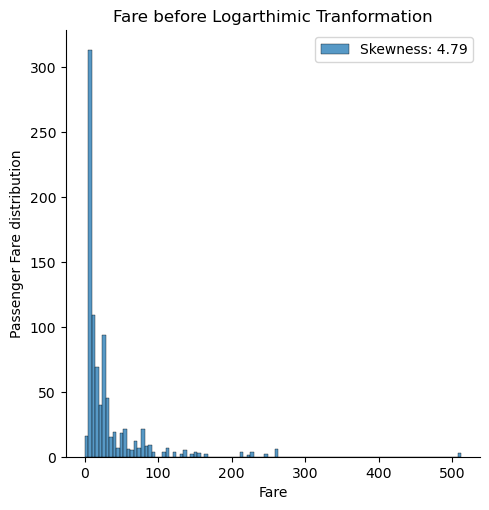

In [500]:
sns.displot(df["Fare"], label = 'Skewness: %.2f'%(df['Fare'].skew()))
plt.xlabel("Fare")
plt.legend(loc='best')
plt.ylabel("Passenger Fare distribution")
plt.title('Fare before Logarthimic Tranformation')

c:\Users\henoc\.conda\envs\tf\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\henoc\.conda\envs\tf\lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


Text(0.5, 1.0, 'Fare After Logarthimic Tranformation')

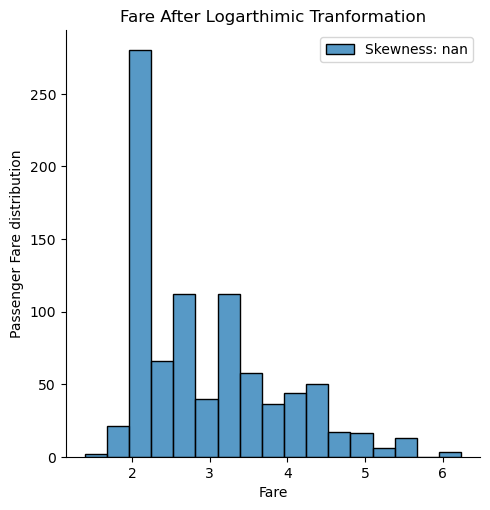

In [501]:
df["Fare"] = np.log(df["Fare"])

sns.displot(df["Fare"], label = 'Skewness: %.2f'%(df['Fare'].skew()))
plt.xlabel("Fare")
plt.legend(loc='best')
plt.ylabel("Passenger Fare distribution")
plt.title('Fare After Logarthimic Tranformation')

In [502]:
df.to_csv("data/processed_data.csv", index=False)   # Save the data

In [503]:
data = "data/processed_data.csv"
df = pd.read_csv(data)
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,1,0,3,0,22.0,1.981001,2,2,1.0
1,2,1,1,1,38.0,4.266662,0,3,1.0
2,3,1,3,1,26.0,2.070022,2,1,0.0
3,4,1,1,1,35.0,3.972177,2,3,1.0
4,5,0,3,0,35.0,2.085672,2,2,0.0
5,6,0,3,0,29.0,2.135148,1,2,0.0
6,7,0,1,0,54.0,3.948596,2,2,0.0
7,8,0,3,0,2.0,3.048088,2,0,4.0
8,9,1,3,1,27.0,2.409941,2,3,2.0
9,10,1,2,1,14.0,3.403555,0,3,1.0
